In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from google.colab import drive

import nltk

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/USP/2024_1º/ACH2177 - Introdução à Ciência de Dados')

Mounted at /content/gdrive


In [ ]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 20)

In [ ]:
csv_file = 'AirbnbRJRentals.csv'
df = pd.read_csv(csv_file, encoding='utf-8-sig', sep=',').dropna()

In [ ]:
# cut outliers

df = df[df.price < df.price.std()]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,10463735,Sobrado aconcheg...,53918534,Quiá,Laranjeiras,-22.935550,-43.191070,Entire home/apt,581,1,2,2018-02-14,0.03,6,181,0
3,703973293620197060,Suíte com entrad...,20362236,Júlio Cesar,Botafogo,-22.957920,-43.182226,Private room,599,4,1,2022-09-06,0.26,4,363,1
5,23768085,Vamos a praia,86611015,Mauro,Barra da Tijuca,-23.011040,-43.320340,Entire home/apt,494,3,92,2022-11-18,1.59,1,228,24
6,21568335,"Copacabana, pert...",55254246,Ronaldo,Copacabana,-22.960380,-43.173720,Entire home/apt,657,2,2,2022-09-16,0.55,1,241,2
10,38267361,Não está alugando,280937280,Marisa,Flamengo,-22.930190,-43.175550,Private room,500,1,17,2020-02-25,0.42,1,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28294,2677556,Gorgeous Loft at...,13299199,André,Botafogo,-22.944970,-43.182520,Entire home/apt,135,4,71,2021-09-30,0.68,5,211,0
28296,689013693819928481,Apartamento no R...,472932703,Adriana,Recreio dos Band...,-23.018124,-43.466737,Entire home/apt,871,3,1,2022-09-10,0.27,1,365,1
28297,23414904,Nice tranquil ap...,100247568,Cecilia,Copacabana,-22.960430,-43.174090,Entire home/apt,194,2,50,2022-09-05,0.86,1,259,8
28298,48489080,Praia de Botafog...,172482654,Evilene,Botafogo,-22.945580,-43.183610,Entire home/apt,153,15,18,2022-11-20,0.95,13,58,9


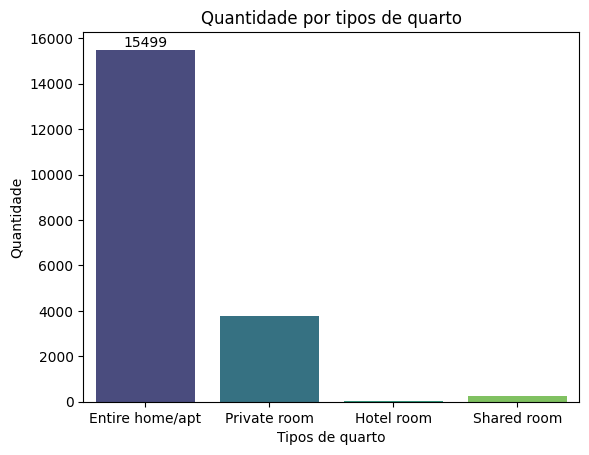

In [ ]:
# Qual a distribuição de preços entre os tipos de acomodação?

ax = sns.countplot(
    data=df,
    x='room_type',
    hue='room_type',
    palette='viridis'
)

ax.bar_label(ax.containers[0])
ax.set_title('Quantidade por tipos de quarto')
ax.set_xlabel('Tipos de quarto')
ax.set_ylabel('Quantidade')
ax.grid(False)

plt.show()

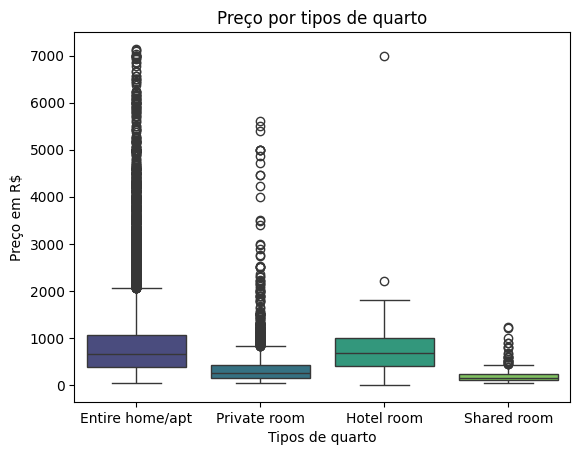

In [ ]:
ax = sns.boxplot(
    data=df,
    x='room_type',
    y='price',
    hue='room_type',
    palette='viridis'
)

ax.set_title('Preço por tipos de quarto')
ax.set_xlabel('Tipos de quarto')
ax.set_ylabel('Preço em R$')
ax.grid(False)

plt.show()

In [ ]:
# E como isso é visto na quantidade de reservas?

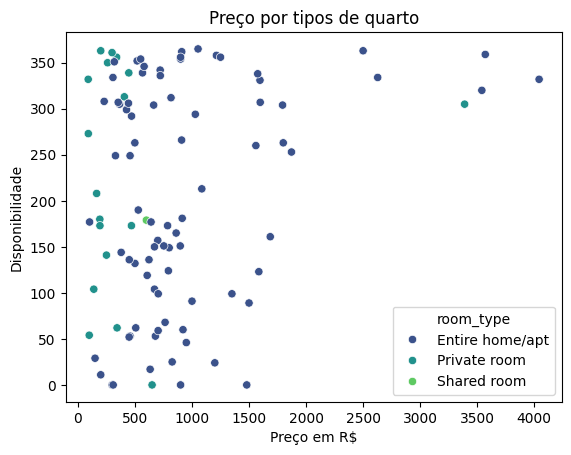

In [ ]:
# O preço por si só afeta a disponibilidade?

ax = sns.scatterplot(
    data=df.sample(100),
    x='price',
    y='availability_365',
    hue='room_type',
    palette='viridis'
)

ax.set_title('Preço por tipos de quarto')
ax.set_ylabel('Disponibilidade')
ax.set_xlabel('Preço em R$')
ax.grid(False)

plt.show()

In [ ]:
words = nltk.tokenize.word_tokenize(df['name'][0], language='portuguese')
tags = nltk.pos_tag(words)
tags

[('Sobrado', 'NNP'), ('aconchegante', 'NN'), ('e', 'NN'), ('espaçoso', 'NN')]

In [ ]:
df['name'][0]

'Sobrado aconchegante e espaçoso'